In [ ]:
### import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random 
import seaborn as sns

train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')



total = train_df.append(test_df)
total.rename(columns={'PassengerId':'Id', 'SibSp':'Sib', 'Embarked':'Emb'}, inplace=True)
total = total.set_index("Id")

total[['Fare']] = np.around(total[['Fare']])
total['Emb'] = total['Emb'].fillna('S')
total['Fare'] = total['Fare'].fillna(33.0)
total['Name'].str.split(".").str[0].str.split(', ').str[1].value_counts()
total['Name'].str.split(".").str[0].str.split(', ').str[1]

mapping = {'Capt':'Military',
            'Col':'Military',
            'Don':'Noble',
            'Dona':'Noble',
            'Dr':'Dr',
            'Jonkheer':'Noble',
            'Lady':'Noble',
            'Major':'Military',
            'Master':'Master',
            'Miss':'Miss',
            'Mlle':'Other',
            'Mme':'Other',
            'Mr':'Mr',
            'Mrs':'Mrs',
            'Ms':'Ms',
            'Rev':'Clergy',
            'Sir':'Noble',
            'the Countess':'Noble',
            }

title_countmapping = {"Mr":1,
                      "Miss"  :     2 ,
                      "Mrs"     :  3  ,
                      "Master"  :  4   ,
                      "Clergy"   :   5  ,
                      "Dr":   6  ,
                      "Military"  :  7  ,
                      "Noble":   8 ,
                      "Other":9,
                      "Ms":10}

sex_mapping = {
    'male':0,
    'female':1
}


total['Title'] =total['Name'].str.split(".").str[0].str.split(', ').str[1].map(mapping)

total['Family_name'] = total['Name'].str.split(".").str[0].str.split(', ').str[0]

total['Family_count'] = total['Sib'] + total['Parch']
total.drop(['Sib','Parch','Name'], axis=1, inplace=True)

total['Cabin'] = total['Cabin'][total['Cabin'].str.split().notnull()].str[0]

for i in range(1,len(total)):
    if total.loc[i,'Ticket'].isnumeric():
        total.loc[i,'Ticket'] = len(total.loc[i,'Ticket'])
    else:
        total.loc[i,'Ticket'] = total.loc[i,'Ticket'].split()[0]
        
age_mean = np.around(total['Age'].mean(skipna=True))
total['Age'] = total["Age"].fillna(age_mean)

total['Title'] = total["Title"].map(title_countmapping)


total['Sex'] = total["Sex"].map(sex_mapping)


total.loc[ total['Age'] <=10, 'Age']=0
total.loc[(total['Age'] > 10) & (total['Age'] <=20), 'Age'] = 1
total.loc[(total['Age'] > 20) & (total['Age'] <=30), 'Age'] = 2
total.loc[(total['Age'] > 30) & (total['Age'] <=40), 'Age'] = 3
total.loc[(total['Age'] > 40) & (total['Age'] <=50), 'Age'] = 4
total.loc[(total['Age'] > 50) & (total['Age'] <=60), 'Age'] = 5
total.loc[(total['Age'] > 60) & (total['Age'] <=70), 'Age'] = 6
total.loc[(total['Age'] > 70), 'Age'] = 7

In [322]:
total.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Emb,Title,Family_name,Family_count
Id,,,,,,,,,,,
1,0.0,3,0,2.0,A/5,7.0,NaN,S,1,Braund,1
2,1.0,1,1,3.0,PC,71.0,C,C,3,Cumings,1
3,1.0,3,1,2.0,STON/O2.,8.0,NaN,S,2,Heikkinen,0
4,1.0,1,1,3.0,6,53.0,C,S,3,Futrelle,1
5,0.0,3,0,3.0,6,8.0,NaN,S,1,Allen,0


In [352]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Pclass        1309 non-null   int64  
 2   Sex           1309 non-null   int64  
 3   Age           1309 non-null   float64
 4   Ticket        1309 non-null   object 
 5   Fare          1309 non-null   float64
 6   Cabin         295 non-null    float64
 7   Emb           1309 non-null   int64  
 8   Title         1309 non-null   int64  
 9   Family_name   1309 non-null   object 
 10  Family_count  1309 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 155.0+ KB


In [300]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','dead']
    df.plot(kind='bar', stacked=True,)
    print(feature)

Pclass
Sex
Age
Fare
Emb
Title
Family_count
Cabin


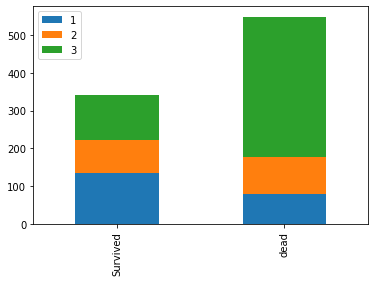

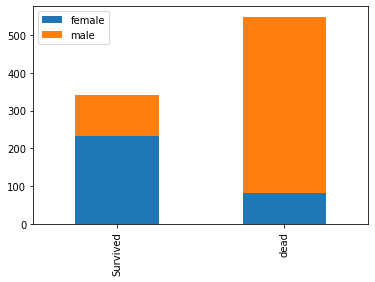

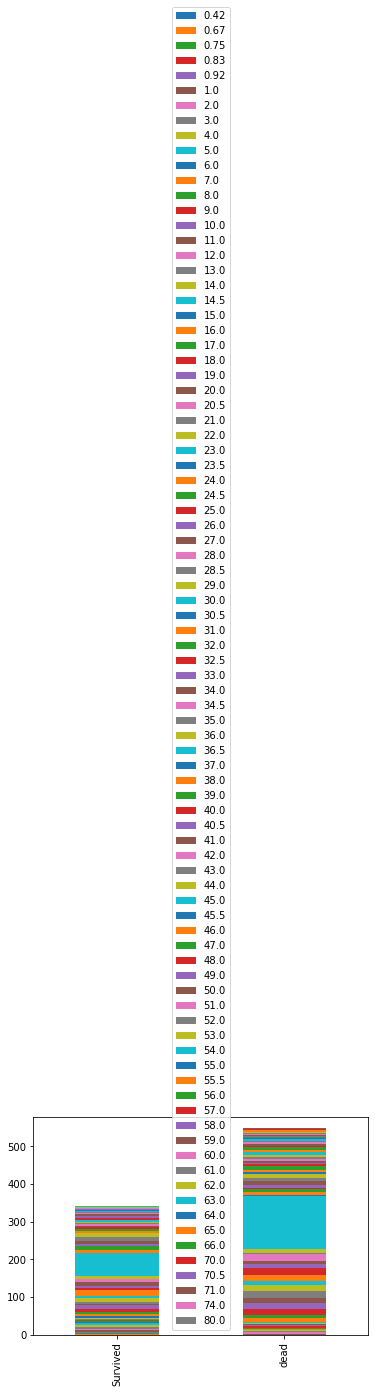

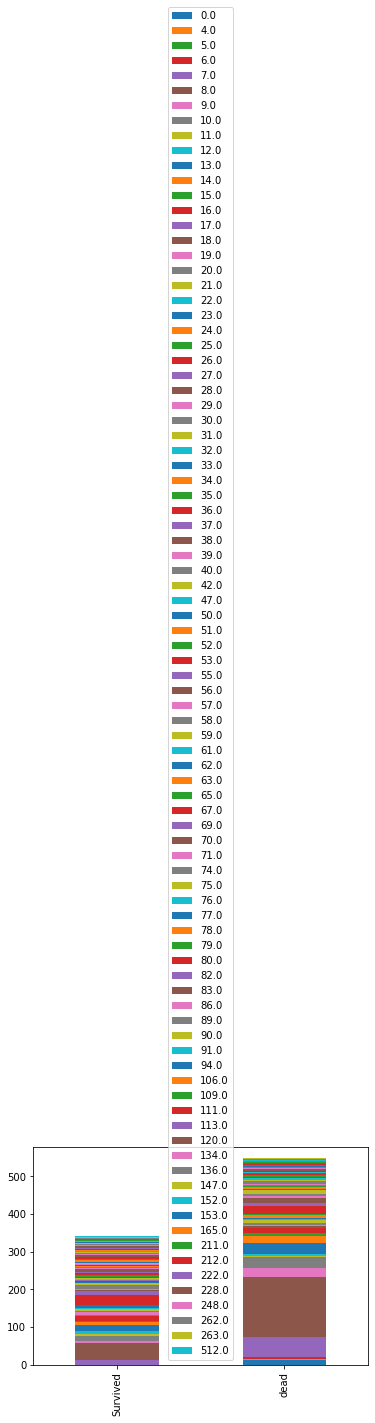

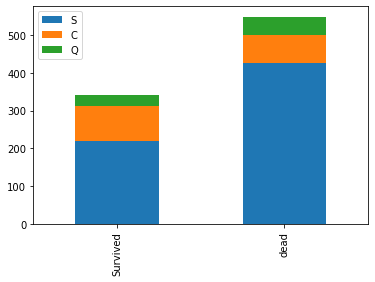

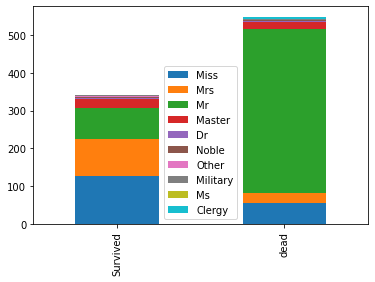

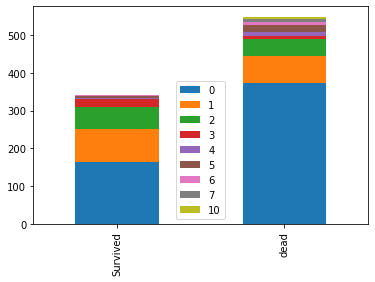

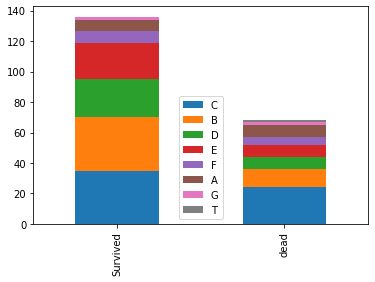

In [301]:
for a in ['Pclass','Sex','Age','Fare','Emb','Title','Family_count','Cabin']:
    bar_chart(a)

In [296]:
total.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Cabin', 'Emb',
       'Title', 'Family_name', 'Family_count'],
      dtype='object')

In [355]:
total[total["Age"] == 7]

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Emb,Title,Family_name,Family_count
Id,,,,,,,,,,,
97,0.0,1,0,7.0,PC,35.0,0.0,1,1,Goldschmidt,0
117,0.0,3,0,7.0,6,8.0,5.0,2,1,Connors,0
494,0.0,1,0,7.0,PC,50.0,2.0,1,1,Artagaveytia,0
631,1.0,1,0,7.0,5,30.0,0.0,0,1,Barkworth,0
852,0.0,3,0,7.0,6,8.0,5.0,0,1,Svensson,0
988,NaN,1,1,7.0,5,79.0,2.0,0,3,Cavendish,1


In [324]:

emb_mapping = {'S':0, 'C':1, 'Q':2}
total['Emb'] = total['Emb'].map(emb_mapping)

In [347]:
cabin_mapping  = {
    'A':0,
    'B':1,
    'C':2,
    'D':3,
    'E':4,
    'F':5,
    'G':6,
    'T':7,
}


total['Cabin'] = total['Cabin'].map(cabin_mapping)

In [348]:
total['Cabin'].value_counts()

2.0    94
1.0    65
3.0    46
4.0    41
0.0    22
5.0    21
6.0     5
7.0     1
Name: Cabin, dtype: int64

In [361]:
total.drop(['Ticket','Family_name'], axis=1, inplace=True)

In [367]:
train = total.iloc[:891,:]
test = total.iloc[891:,:]

In [368]:
from sklearn.preprocessing import StandardScaler as SS
ss = SS()
ss_train = ss.fit_transform(train)
ss_test = ss.fit_transform(test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [369]:
ss_train

array([[-0.78927234,  0.82737724, -0.73769513, ..., -0.56883712,
        -0.62445272,  0.05915988],
       [ 1.2669898 , -1.56610693,  1.35557354, ...,  1.00518113,
         0.94504622,  0.05915988],
       [ 1.2669898 ,  0.82737724,  1.35557354, ..., -0.56883712,
         0.16029675, -0.56097483],
       ...,
       [-0.78927234,  0.82737724,  1.35557354, ..., -0.56883712,
         0.16029675,  1.29942929],
       [ 1.2669898 , -1.56610693, -0.73769513, ...,  1.00518113,
        -0.62445272, -0.56097483],
       [-0.78927234,  0.82737724, -0.73769513, ...,  2.57919938,
        -0.62445272, -0.56097483]])

In [370]:
ss_test

array([[        nan,  0.87348191, -0.75592895, ...,  2.24316522,
        -0.67395662, -0.5534426 ],
       [        nan,  0.87348191,  1.32287566, ..., -0.6778412 ,
         1.05434931,  0.10564289],
       [        nan, -0.31581919, -0.75592895, ...,  2.24316522,
        -0.67395662, -0.5534426 ],
       ...,
       [        nan,  0.87348191, -0.75592895, ..., -0.6778412 ,
        -0.67395662, -0.5534426 ],
       [        nan,  0.87348191, -0.75592895, ..., -0.6778412 ,
        -0.67395662, -0.5534426 ],
       [        nan,  0.87348191, -0.75592895, ...,  0.78266201,
         1.91850228,  0.76472838]])

In [1]:
import tensorflow as tf

In [371]:
# dataset split 
#train = total.iloc[:891,:]
train_df = total.iloc[:891,1:]
target_df = total.iloc[:891,0]

In [262]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

x_train, x_target, y_train, y_target = tts(train_df, target_df)

In [ ]:
lr.fit(x_train, y_train)

In [272]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import GridSearchCV

dt = DTC()
param_grid = { "min_samples_split" : [ 2,3,4,5,6,7], "min_samples_leaf": [1,2,5,10,20,30,40,50,60,70,80,90,100]}
gs = GridSearchCV(estimator=dt, param_grid=, scoring='accuracy', cv=3, n_jobs=-1)

gs.fit(x_train, y_train)

TypeError: __init__() missing 1 required positional argument: 'param_grid'

In [273]:
dt.fit(x_train, y_train)

ValueError: could not convert string to float: 'male'